In [1]:
#####################
# Wang Zijia 1002885
#####################
# please change the file path first (in the 2nd cell)

import math
import operator

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def k_means_algo(data, no_k, centroids):
    distance = []
    centroid_clusters = [[] for i in range(len(centroids))]
    global n
    total_cost = 0

    # TODO 1 calculate the distance from the point to each centroid and store in dictionary,
    #  format: {1:[12,3,4,54,543..(8 values)], 2:[..,..], ..., 210012: [...]}
    for i in range(len(data)):
        distance.append([calculate_euclidean_distance(data[i], centroids[j]) for j in range(len(centroids))])

    # TODO 2 find the smallest distance in each distance.value,
    #  and store the corresponding key into the sublist in centroid_clustors (there are len(centroids) sublists)
    for i in range(len(distance)):
        centroid_clusters[distance[i].index(min(distance[i]))].append(i)
        total_cost += (min(distance[i]))**2

    # TODO: plot the graph of cost against iteration number n
    global n_x, total_cost_y
    n_x.append(n)
    total_cost_y.append(total_cost)

    # TODO 3 remove empty cluster from the centroids and calculate the new centroids
    non_empty_cluster_index = [centroid_clusters.index(cluster) for cluster in centroid_clusters if cluster != []]
    cleared_centroids = [centroids[i] for i in non_empty_cluster_index]
    cleared_centroid_clusters = [cluster for cluster in centroid_clusters if cluster]
    new_centroids = recompute_centroids(cleared_centroids, cleared_centroid_clusters, data)

    # print("centroids: ", centroids)
    # print("new centroids: ", new_centroids)
    if new_centroids == centroids and cleared_centroid_clusters == centroid_clusters:
        # for getting the number of pixels in each cluster
        num_pixel_in_clusters = []
        for i in range(len(cleared_centroid_clusters)):
            num_pixel_in_clusters.append(len(cleared_centroid_clusters[i]))

        # plot the graph
        plot_cost_against_n(n_x, total_cost_y)

        print("resulted centroids: ", new_centroids)
        print("number of pixels in each cluster: ", num_pixel_in_clusters)
        return new_centroids, cleared_centroid_clusters
    else:
        n += 1
        k_means_algo(data, no_k, new_centroids)
        return new_centroids, cleared_centroid_clusters


def generate_image(centroids, centroid_clusters, data):
    rows, columns = 516, 407
    pixel_cluster = {}
    for i in range(len(centroid_clusters)):
        for j in range(len(centroid_clusters[i])):
            pixel_cluster[centroid_clusters[i][j]] = list(centroids[i])

    pixel_value = [pixel_cluster[i][0:] for i in range(len(pixel_cluster))]
    concat_pixel_value = bytes([int(j) for i in pixel_value for j in i])

    img = Image.frombytes("RGB", (columns, rows), concat_pixel_value)
    img.show()
    pass


def plot_cost_against_n(n, total_cost):
    # print("iterations: ", n, "total cost: ", total_cost)
    plt.plot(n, total_cost)
    plt.show()
    pass


def recompute_centroids(centroids, centroid_clusters, data):
    updated_centroids = []
    for i in range(len(centroids)):
        updated_centroids.append((1/len(centroid_clusters[i])*sum(data[index][0] for index in centroid_clusters[i]),
                                  1/len(centroid_clusters[i])*sum(data[index][1] for index in centroid_clusters[i]),
                                  1/len(centroid_clusters[i])*sum(data[index][2] for index in centroid_clusters[i])))
    return updated_centroids


def calculate_euclidean_distance(point1, point2):
    distance = math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)
    # print(distance)
    return distance


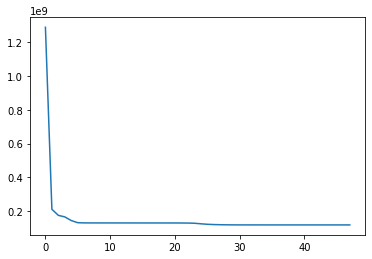

resulted centroids:  [(241.22961460446248, 238.62515212981745, 233.8628803245436), (194.4115865701119, 136.33311389071756, 90.94364713627385), (136.2655562958028, 61.08973065575331, 10.103854573141716), (157.2917327293318, 97.59397508493771, 51.43329558323896), (78.9274371361328, 37.10828688219993, 13.070704818530906), (25.978002322570312, 23.235754234686386, 23.605990629630124)]
number of pixels in each cluster:  [4930, 15190, 52535, 22075, 40365, 74917]


In [2]:
if __name__ == "__main__":
    input_file = "C:/Users/87173/Desktop/term6/Machine Learning/Homework/HW2/HW2_data/1/hw2-image.txt"

    with open(input_file) as file:
        lines = file.read().splitlines()
    
    n = 0  # iteration number
    n_x = []
    total_cost_y = []
    
    input_data = [tuple(int(x) for x in line.split()) for line in lines]
    num_of_clusters = 8
    initial_centroids = [(255, 255, 255), (255, 0, 0), (128, 0, 0), (0, 255, 0), (0, 128, 0), (0, 0, 255), (0, 0, 128), (0, 0, 0)]

    new_centroids, centroid_clusters = k_means_algo(input_data, num_of_clusters, initial_centroids)

    generate_image(new_centroids, centroid_clusters, input_data)
